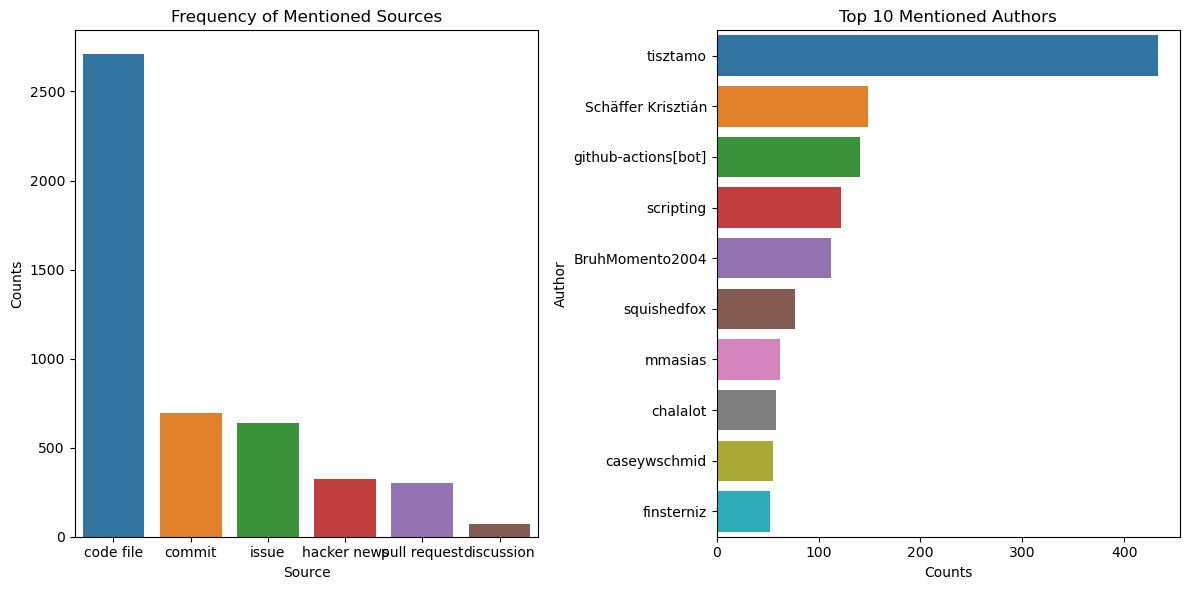

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming chatgpt_data is your DataFrame
# Replace with the actual name of your DataFrame
chatgpt_data = pd.read_csv('/Users/likhitaganipineni/Downloads/ChatGPT_Link_Sharing (1).csv')

# Data preparation for Analysis 1
source_counts = chatgpt_data['MentionedSource'].value_counts()
author_counts = chatgpt_data['MentionedAuthor'].value_counts().head(10)  # Top 10 authors

# Plotting for Analysis 1
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=source_counts.index, y=source_counts.values)
plt.title('Frequency of Mentioned Sources')
plt.ylabel('Counts')
plt.xlabel('Source')

plt.subplot(1, 2, 2)
sns.barplot(x=author_counts.values, y=author_counts.index)
plt.title('Top 10 Mentioned Authors')
plt.xlabel('Counts')
plt.ylabel('Author')

plt.tight_layout()
plt.show()


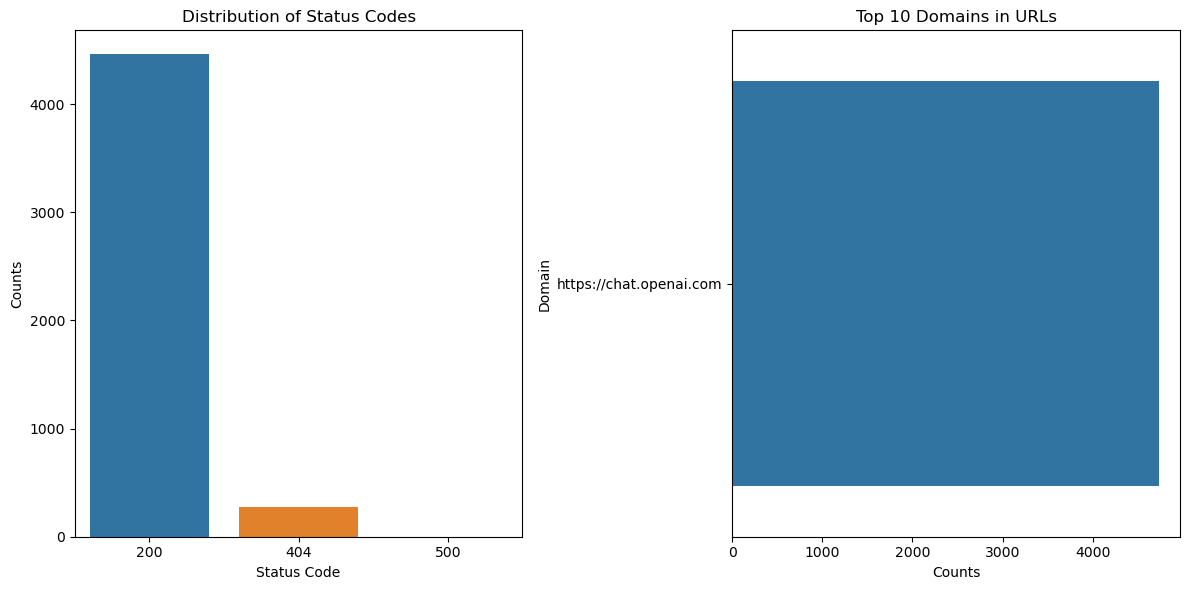

In [3]:
# Data preparation for Analysis 2
status_counts = chatgpt_data['Status'].value_counts()
url_domains = chatgpt_data['URL'].str.extract(r'(https?://[A-Za-z_0-9.-]+)')[0].value_counts().head(10)

# Plotting for Analysis 2
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=status_counts.index, y=status_counts.values)
plt.title('Distribution of Status Codes')
plt.ylabel('Counts')
plt.xlabel('Status Code')

plt.subplot(1, 2, 2)
sns.barplot(x=url_domains.values, y=url_domains.index)
plt.title('Top 10 Domains in URLs')
plt.xlabel('Counts')
plt.ylabel('Domain')

plt.tight_layout()
plt.show()


In [4]:
pip install rouge


Note: you may need to restart the kernel to use updated packages.


In [5]:
from nltk.translate.bleu_score import sentence_bleu
from rouge import Rouge
from sklearn.metrics import f1_score

# Sample sentences for demonstration
# In a real scenario, these should be the actual initial and regenerated responses from ChatGPT
reference = "The quick brown fox jumps over the lazy dog."
candidate = "A fast brown fox leaps over a lazy dog."

# Calculating BLEU score
bleu_score = sentence_bleu([reference.split()], candidate.split())

# Calculating ROUGE scores
rouge = Rouge()
rouge_scores = rouge.get_scores(candidate, reference)

# Since F1 score needs binary or multiclass classification labels, we cannot directly compute it for text
# However, for demonstration, we use sample binary labels
# In a real scenario, these should be classification labels (e.g., relevant/irrelevant, accurate/inaccurate)
true_labels = [0, 1, 1, 0, 0, 1]  # Sample true labels
predicted_labels = [0, 1, 0, 1, 0, 1]  # Sample predicted labels
f1 = f1_score(true_labels, predicted_labels)

bleu_score, rouge_scores, f1

/Users/likhitaganipineni/anaconda3/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Users/likhitaganipineni/anaconda3/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


(9.106239987484608e-155,
 [{'rouge-1': {'r': 0.5555555555555556,
    'p': 0.5555555555555556,
    'f': 0.5555555505555557},
   'rouge-2': {'r': 0.25, 'p': 0.25, 'f': 0.24999999500000009},
   'rouge-l': {'r': 0.5555555555555556,
    'p': 0.5555555555555556,
    'f': 0.5555555505555557}}],
 0.6666666666666666)

In [11]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
file_path = '/Users/likhitaganipineni/Downloads/ChatGPT_Link_Sharing (1).csv'
chatgpt_data = pd.read_csv(file_path)

# Create a contingency table
contingency_table = pd.crosstab(chatgpt_data['MentionedSource'], chatgpt_data['MentionedAuthor'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print out the results
print("Chi-squared value:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)


Chi-squared value: 21119.023833106483
P-value: 0.0
Degrees of freedom: 8595
Expected frequencies:
 [[1.14430594 0.57215297 0.57215297 ... 0.57215297 1.14430594 2.86076484]
 [0.29326009 0.14663004 0.14663004 ... 0.14663004 0.29326009 0.73315022]
 [0.02957955 0.01478977 0.01478977 ... 0.01478977 0.02957955 0.07394887]
 [0.13691105 0.06845553 0.06845553 ... 0.06845553 0.13691105 0.34227763]
 [0.26875132 0.13437566 0.13437566 ... 0.13437566 0.26875132 0.6718783 ]
 [0.12719206 0.06359603 0.06359603 ... 0.06359603 0.12719206 0.31798014]]


In [10]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
file_path = '/Users/likhitaganipineni/Downloads/ChatGPT_Link_Sharing (1).csv'
chatgpt_data = pd.read_csv(file_path)

# Create a contingency table
contingency_table = pd.crosstab(chatgpt_data['Status'], chatgpt_data['URL'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print out the results
print("Chi-squared value:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)


Chi-squared value: 9450.120438218477
P-value: 3.759694750151787e-45
Degrees of freedom: 7586
Expected frequencies:
 [[9.42319882e-01 9.42319882e-01 9.42319882e-01 ... 9.42319882e-01
  9.42319882e-01 9.42319882e-01]
 [5.72575533e-02 5.72575533e-02 5.72575533e-02 ... 5.72575533e-02
  5.72575533e-02 5.72575533e-02]
 [4.22564969e-04 4.22564969e-04 4.22564969e-04 ... 4.22564969e-04
  4.22564969e-04 4.22564969e-04]]


In [1]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
file_path = '/Users/likhitaganipineni/Downloads/ChatGPT_Link_Sharing (1).csv'
chatgpt_data = pd.read_csv(file_path)

# Create a contingency table
contingency_table = pd.crosstab(chatgpt_data['MentionedSource'], chatgpt_data['Status'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print out the results
print("Chi-squared value:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)


Chi-squared value: 77.3260383047081
P-value: 1.674581350997612e-12
Degrees of freedom: 10
Expected frequencies:
 [[2.55180224e+03 1.55053454e+02 1.14430594e+00]
 [6.53969998e+02 3.97367420e+01 2.93260089e-01]
 [6.59623917e+01 4.00802873e+00 2.95795479e-02]
 [3.05311642e+02 1.85514473e+01 1.36911050e-01]
 [5.99315445e+02 3.64158039e+01 2.68751321e-01]
 [2.83638284e+02 1.72345236e+01 1.27192056e-01]]
